***1 Задача*** - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
water_df = pd.read_csv('water.csv')
water_df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [3]:
water_df.info()
#пропусков нет, смущает небольшое количество данных(61 строка) в датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [4]:
water_df.drop(["Unnamed: 0"],axis =1,inplace=True)
water_df.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18


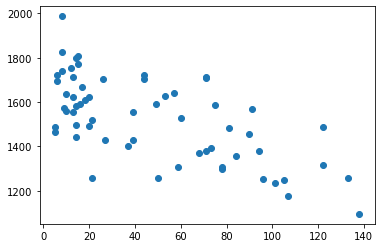

In [5]:
#Точечный график для всего датасета
plt.scatter(water_df['hardness'], water_df['mortality'])

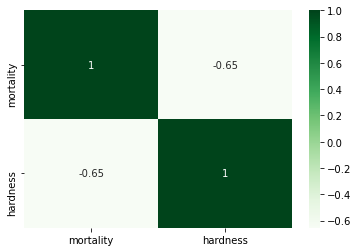

In [6]:
sns.heatmap(water_df.corr(), cmap='Greens', annot= True)

Визуально прослеживается обратная зависимость переменных - при возрастании значений одной из них, значения другой убывают

In [7]:
#Коэффициент корреляции Пирсона
water_df.corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [8]:
#Коэффициент корреляции Спирмана
water_df.corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


Значения показателей свидетельствуют о средней отрицательной корреляцией между переменными

In [27]:
# Модель линейной регрессии
X = water_df[['hardness']]
y = water_df['mortality']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred = model.predict(X_test)

In [32]:
model.score(X_test, y_test)
# средний коэффициент детерминации, точность модели оставляет желать лучшего

0.5046490611017092

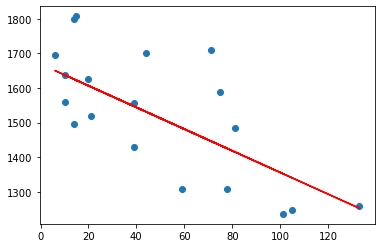

In [33]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [36]:
X_const = sm.add_constant(X_train)

In [37]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Fri, 18 Dec 2020   Prob (F-statistic):           7.83e-06
Time:                        21:22:10   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

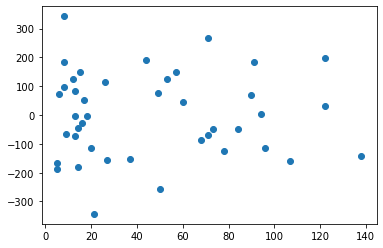

In [40]:
plt.scatter(X_const.iloc[:, 1], results.resid)
# остатки распределены хаотично, наблюдается симметричность относительно нуля

***Вывод:*** Прослеживается средняя отрицательная корреляция между переменными, посредственныый коэффициент детерминации, небольшое количество данных для анализа - делать вывод о реальной зависимости между двумя перемеными по этим вводным не очень корректно, поэтому я думаю, что связь между жёсткостью воды и средней годовой смертностью обуславливается каким-то иным фактором, не учтенным в нашей модели.

***Задача 2*** Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Начнем с данных для юга

In [47]:
water_df_s = water_df[water_df.location == 'South']
water_df_s.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


In [46]:
water_df_s.info()
# совсем мало наблюдений осталось, думаю это вообще будет не репрезентативно

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 59
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   26 non-null     object
 1   town       26 non-null     object
 2   mortality  26 non-null     int64 
 3   hardness   26 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.0+ KB


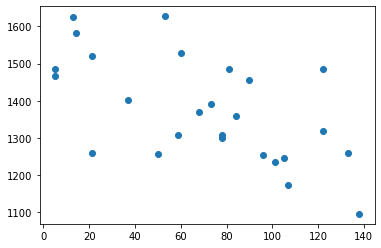

In [53]:
#Точечный график
plt.scatter(water_df_s['hardness'], water_df_s['mortality'])

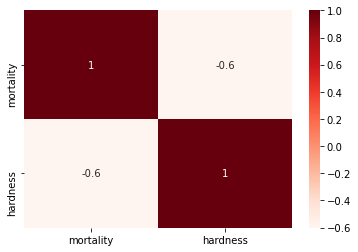

In [49]:
sns.heatmap(water_df_s.corr(), cmap='Reds', annot= True)
#визуальная отрицательная корреляция сохраняется

In [50]:
#Коэффициент корреляции Пирсона
water_df_s.corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [51]:
#Коэффициент корреляции Спирмана
water_df_s.corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


Значения показателей также сохранили обратную корреляцию

In [92]:
# Модель линейной регрессии
X = water_df_s[['hardness']]
y = water_df_s['mortality']

In [108]:
# очень мало данных для построения модели, сделаем test_size меньше, иначе модель не набирает No. Observations = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

In [115]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [116]:
y_pred = model.predict(X_test)

In [117]:
model.score(X_test, y_test)
# такой коэффциент говорит об абсолютной бесполезности подобной модели

-1.9300174406554644

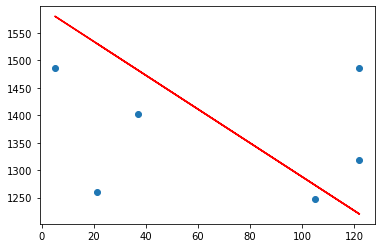

In [112]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
# и график это подтверждает

In [113]:
X_const = sm.add_constant(X_train)

In [114]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     24.41
Date:                Sat, 19 Dec 2020   Prob (F-statistic):           0.000106
Time:                        00:53:06   Log-Likelihood:                -119.64
No. Observations:                  20   AIC:                             243.3
Df Residuals:                      18   BIC:                             245.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1595.4338     49.134     32.471      0.0

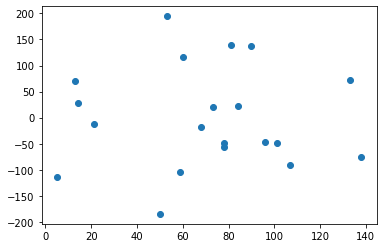

In [118]:
plt.scatter(X_const.iloc[:, 1], results.resid)

Рассмотрим данные по северу

In [63]:
water_df_n = water_df[water_df.location == 'North']
water_df_n.head()

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


In [64]:
water_df_n.info()
# немного больше наблюдений, если сравнивать с югом

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1 to 60
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   location   35 non-null     object
 1   town       35 non-null     object
 2   mortality  35 non-null     int64 
 3   hardness   35 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.4+ KB


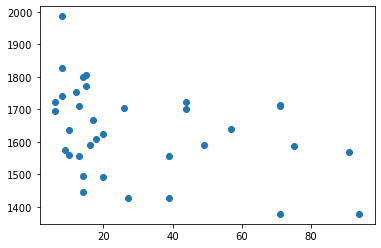

In [91]:
#Точечный график
plt.scatter(water_df_n['hardness'], water_df_n['mortality'])
# визуально корреляция переменных слабо определяема

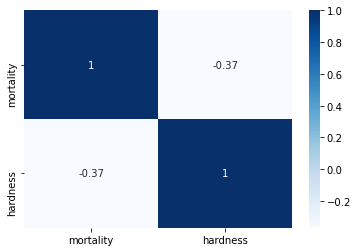

In [66]:
sns.heatmap(water_df_n.corr(), cmap='Blues', annot= True)

In [67]:
#Коэффициент корреляции Пирсона
water_df_n.corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [69]:
#Коэффициент корреляции Спирмана
water_df_n.corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


Значения показателей слабо отрицательно скоррелированы

In [70]:
# Модель линейной регрессии
X = water_df_n[['hardness']]
y = water_df_n['mortality']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [87]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [88]:
y_pred = model.predict(X_test)

In [89]:
model.score(X_test, y_test)
# Коэффициент детерминации близок к 0, похоже, что связь между показателями отсутствует

0.018885304285745863

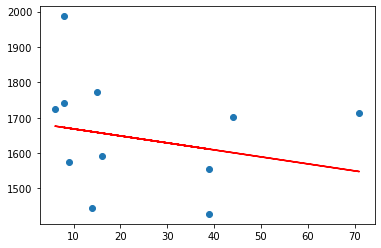

In [90]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [76]:
X_const = sm.add_constant(X_train)

In [77]:
model = sm.OLS(y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     5.269
Date:                Sat, 19 Dec 2020   Prob (F-statistic):             0.0316
Time:                        00:02:48   Log-Likelihood:                -147.20
No. Observations:                  24   AIC:                             298.4
Df Residuals:                      22   BIC:                             300.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1688.1502     37.137     45.457      0.0

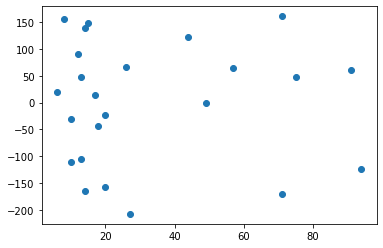

In [79]:
plt.scatter(X_const.iloc[:, 1], results.resid)
# график остатков не хаотичен, в левой части графика остатки группируются более плотно

***Вывод:*** Что получили после разделения данных:
* южные города примерно сохраняют отрицательную корреляцию между показателями, в то время как в северных - отрицательная корреляция прослеживается на 44% слабее по сравнению с общими данными
* линейная регрессионная модель при разделении городов стала еще менее подходящей для получения выводов о зависимости переменных